In [3]:
import numpy as np
import tensorflow as tf
import os 
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
def parse_data_from_csv(file_path, reshape = (None, None)):

  with open(file_path) as file:
    ### START CODE HERE

    # Use csv.reader, passing in the appropriate delimiter
    # Remember that csv.reader can be iterated and returns one line in each iteration
    labels = []
    images = []
    csv_reader = csv.reader(file, delimiter='\n')
    counter = 1
    for row in csv_reader:      
      if counter != 1:
        row = np.array(row[0].split(','))
        labels.append(row[0])
        images.append(np.array(row[1:], dtype=np.float64).reshape(28,28)) 
      counter += 1

    labels = np.array(labels, dtype = np.float32)
    images = np.array(images, dtype = np.float64)
    
    ### END CODE HERE

    return images, labels

In [11]:
def split_dataset(images, labels, train_split = 0.75, shuffle = True):
    train_images, train_labels,  validation_images, validation_labels = train_test_split(images, labels , train_size= train_split, stratify=labels, shuffle=True)
    return train_images, train_labels,  validation_images, validation_labels

In [12]:
def expand_dimension( collection , axis):
    return np.expand_dims( collection , axis=axis)

In [13]:
def show_first_X_images(image_collection, number_of_images_to_show, random = False, cmap = 'gray' , figsize = (None, None)):
    
    fig, ax = plt.subplots(number_of_images_to_show, figsize = figsize)
    indexes = range(number_of_images_to_show)
    
    if random == True:
        indexes = np.random.randint(low=0, high=image_collection.shape[0]-1, size=number_of_images_to_show)

    for index, image_index in enumerate(indexes):
        img = image_collection[image_index, :]
            
        ax[index].imshow(img, cmap = cmap)

In [24]:
def print_classes_lables(collection):
    element, count = np.unique( collection, return_counts=True)
    print(f'unique classes: {element} \n frequency: {count}\n')

In [19]:
images,  labels =  parse_data_from_csv('../datasets/Fashion-MNIST/fashion-mnist_train.csv')
print(f'labels shape: {labels.shape}')
print(f'images shape: {images.shape}')

labels shape: (60000,)
images shape: (60000, 28, 28)


In [21]:
train_x, val_x, train_y, val_y = split_dataset(images=images, 
                                                labels=labels, 
                                                train_split=0.75, 
                                                shuffle=True)

In [25]:
print(f' train images: {train_x.shape}')
print(f' train lables: {train_y.shape}')
print_classes_lables(train_y)


print(f' val images: {val_x.shape}')
print(f' val lables: {val_y.shape}')
print_classes_lables(val_y)

 train images: (45000, 28, 28)
 train lables: (45000,)
unique classes: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] 
 frequency: [4500 4500 4500 4500 4500 4500 4500 4500 4500 4500]

 val images: (15000, 28, 28)
 val lables: (15000,)
unique classes: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] 
 frequency: [1500 1500 1500 1500 1500 1500 1500 1500 1500 1500]



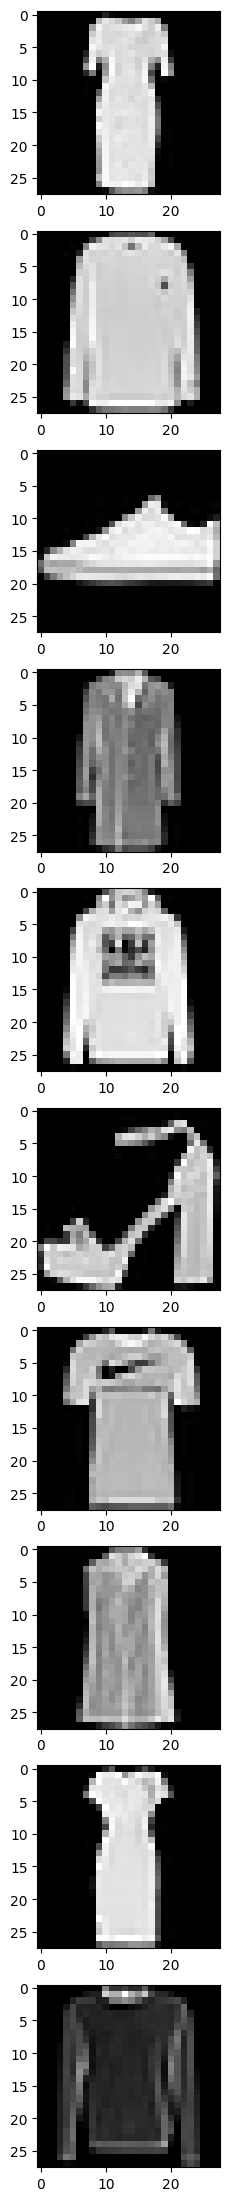

In [26]:
show_first_X_images( image_collection=train_x, number_of_images_to_show=10, figsize = (28, 28) , cmap='gray' )

In [27]:
train_x = expand_dimension(train_x, axis=3)
val_x = expand_dimension(val_x, axis=3)

print(f' train images: {train_x.shape}')
print(f' val images: {val_x.shape}')

 train images: (45000, 28, 28, 1)
 val images: (15000, 28, 28, 1)


In [28]:
train_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255,
                                                                horizontal_flip=True,
                                                                vertical_flip=False,                                                                
                                                                width_shift_range=0.3,
                                                                fill_mode='nearest')

validation_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

In [29]:
train_images = train_img_gen.flow(x=train_x,
                                  y=train_y,                                
                                  batch_size=16)

validation_images = validation_img_gen.flow(x = val_x,
                                            y = val_y,
                                            batch_size=16)

In [42]:
model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(16,5, activation='relu', input_shape=(28,28,1) ),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(32,3,activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(64,1,activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimiser = tf.keras.optimizers.Adam(lr=0.01)

model.compile(loss=loss, optimizer=optimiser, metrics=['accuracy'])

In [43]:
history = model.fit(train_images,
                    epochs=20,
                    validation_data = validation_images)

Epoch 1/20


2023-06-24 20:06:29.810443: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-24 20:06:29.963049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2807/2813 [============================>.] - ETA: 0s - loss: 0.7613 - accuracy: 0.7127

2023-06-24 20:06:52.434161: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-24 20:06:52.468461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2813/2813 [==============================] - 26s 9ms/step - loss: 0.7613 - accuracy: 0.7128 - val_loss: 0.5646 - val_accuracy: 0.7717
Epoch 2/20
2813/2813 [==============================] - 25s 9ms/step - loss: 0.5515 - accuracy: 0.7898 - val_loss: 0.4857 - val_accuracy: 0.8223
Epoch 3/20
2813/2813 [==============================] - 25s 9ms/step - loss: 0.4961 - accuracy: 0.8100 - val_loss: 0.4429 - val_accuracy: 0.8373
Epoch 4/20
2813/2813 [==============================] - 26s 9ms/step - loss: 0.4654 - accuracy: 0.8218 - val_loss: 0.4375 - val_accuracy: 0.8362
Epoch 5/20
2813/2813 [==============================] - 25s 9ms/step - loss: 0.4398 - accuracy: 0.8325 - val_loss: 0.4357 - val_accuracy: 0.8358
Epoch 6/20
2813/2813 [==============================] - 25s 9ms/step - loss: 0.4284 - accuracy: 0.8373 - val_loss: 0.4484 - val_accuracy: 0.8267
Epoch 7/20
2813/2813 [==============================] - 25s 9ms/step - loss: 0.4131 - accuracy: 0.8442 - val_loss: 0.4242 - val_accuracy: 0.8